In [1]:
import numpy as np

class Counter(dict):
    largest_non_zero = 0
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val
            if (item != 0) and (new_val > self.largest_non_zero):
                self.largest_non_zero = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    ## default is to not include zero counts in the top three, set zero_counts = True in function call to include zero counts
    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        spatial = counts.largest_non_zero
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2 or extinction, depending)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R, spatial

In [9]:
N =  4000
M = 3*N
Tmax = 500

## try changing Tmax = 200


## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

In [10]:
b = np.linspace(0.002, 0.5, 20)
s1star = []
for i in range(len(b)):
    s1 = []
    for j in range(25):
        times, R, spatial = find_tranformation_matrix(b[i], E, N, Tmax, 0)
        s1.append(spatial)
    print(s1)
    s1star.append(s1)
print(s1star)

[2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2]
[4, 5, 5, 5, 7, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 6, 4, 5, 4, 5, 6, 5, 4, 4]
[7, 6, 7, 9, 5, 9, 8, 9, 7, 7, 7, 8, 6, 8, 7, 7, 6, 7, 7, 8, 8, 7, 7, 6, 7]
[9, 9, 12, 10, 8, 15, 10, 10, 8, 7, 9, 10, 9, 10, 9, 8, 8, 8, 7, 9, 9, 9, 8, 8, 9]
[12, 15, 18, 11, 13, 18, 11, 15, 14, 15, 14, 11, 10, 17, 17, 12, 12, 16, 16, 14, 11, 11, 10, 12, 11]
[20, 30, 22, 19, 41, 16, 19, 22, 17, 21, 20, 25, 14, 21, 22, 20, 27, 27, 20, 21, 21, 30, 25, 27, 27]
[84, 36, 35, 51, 54, 37, 34, 43, 58, 42, 34, 49, 46, 25, 30, 72, 27, 38, 27, 74, 52, 65, 49, 31, 38]
[510, 518, 498, 553, 492, 545, 579, 524, 490, 493, 554, 552, 556, 488, 502, 593, 548, 503, 519, 501, 486, 532, 525, 533, 496]
[912, 929, 912, 959, 924, 920, 931, 963, 926, 900, 915, 965, 906, 892, 924, 956, 914, 941, 958, 894, 933, 923, 907, 918, 927]
[1219, 1235, 1236, 1244, 1231, 1260, 1236, 1240, 1239, 1247, 1227, 1250, 1210, 1228, 1253, 1245, 1241, 1239, 1208, 1224, 1218, 1254, 1

In [2]:
s1star = [[2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2], [4, 5, 5, 5, 7, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 6, 4, 5, 4, 5, 6, 5, 4, 4], [7, 6, 7, 9, 5, 9, 8, 9, 7, 7, 7, 8, 6, 8, 7, 7, 6, 7, 7, 8, 8, 7, 7, 6, 7], [9, 9, 12, 10, 8, 15, 10, 10, 8, 7, 9, 10, 9, 10, 9, 8, 8, 8, 7, 9, 9, 9, 8, 8, 9], [12, 15, 18, 11, 13, 18, 11, 15, 14, 15, 14, 11, 10, 17, 17, 12, 12, 16, 16, 14, 11, 11, 10, 12, 11], [20, 30, 22, 19, 41, 16, 19, 22, 17, 21, 20, 25, 14, 21, 22, 20, 27, 27, 20, 21, 21, 30, 25, 27, 27], [84, 36, 35, 51, 54, 37, 34, 43, 58, 42, 34, 49, 46, 25, 30, 72, 27, 38, 27, 74, 52, 65, 49, 31, 38], [510, 518, 498, 553, 492, 545, 579, 524, 490, 493, 554, 552, 556, 488, 502, 593, 548, 503, 519, 501, 486, 532, 525, 533, 496], [912, 929, 912, 959, 924, 920, 931, 963, 926, 900, 915, 965, 906, 892, 924, 956, 914, 941, 958, 894, 933, 923, 907, 918, 927], [1219, 1235, 1236, 1244, 1231, 1260, 1236, 1240, 1239, 1247, 1227, 1250, 1210, 1228, 1253, 1245, 1241, 1239, 1208, 1224, 1218, 1254, 1218, 1222, 1235], [1483, 1468, 1474, 1455, 1474, 1495, 1496, 1537, 1482, 1502, 1509, 1519, 1472, 1485, 1502, 1499, 1466, 1474, 1487, 1480, 1472, 1500, 1494, 1491, 1507], [1700, 1708, 1683, 1710, 1710, 1705, 1704, 1711, 1689, 1712, 1681, 1746, 1733, 1689, 1714, 1687, 1682, 1702, 1686, 1720, 1687, 1684, 1703, 1706, 1707], [1891, 1902, 1868, 1873, 1886, 1879, 1917, 1879, 1869, 1853, 1912, 1873, 1872, 1891, 1869, 1888, 1898, 1867, 1870, 1875, 1928, 1886, 1899, 1881, 1874], [2016, 2044, 2086, 2044, 2016, 2039, 2030, 2040, 2024, 2038, 2046, 2059, 2030, 2070, 2017, 2032, 2040, 2019, 2016, 2033, 2038, 2061, 2038, 2021, 2032], [2168, 2161, 2161, 2164, 2157, 2156, 2164, 2174, 2155, 2172, 2152, 2166, 2162, 2184, 2155, 2176, 2168, 2167, 2156, 2176, 2176, 2163, 2162, 2167, 2183], [2276, 2311, 2285, 2288, 2333, 2271, 2273, 2300, 2286, 2259, 2273, 2290, 2277, 2294, 2279, 2287, 2310, 2270, 2293, 2276, 2293, 2292, 2297, 2266, 2272], [2402, 2380, 2376, 2425, 2396, 2395, 2384, 2378, 2402, 2380, 2377, 2375, 2394, 2394, 2390, 2387, 2409, 2373, 2359, 2393, 2391, 2415, 2380, 2387, 2371], [2470, 2481, 2455, 2456, 2459, 2470, 2477, 2511, 2484, 2475, 2473, 2505, 2488, 2468, 2465, 2466, 2479, 2469, 2484, 2507, 2484, 2484, 2474, 2502, 2490], [2577, 2562, 2557, 2589, 2558, 2558, 2570, 2552, 2563, 2564, 2565, 2553, 2562, 2557, 2561, 2541, 2547, 2547, 2567, 2545, 2570, 2554, 2555, 2539, 2546], [2623, 2623, 2621, 2640, 2621, 2624, 2625, 2617, 2630, 2622, 2648, 2629, 2617, 2641, 2648, 2641, 2639, 2670, 2624, 2633, 2627, 2627, 2662, 2631, 2624]]

In [4]:
s1av = []
s1var = []
import numpy as np
for i in range(len(s1star)):
    s1av.append(np.mean(s1star[i]))
    s1var.append(np.var(s1star[i]))

print(s1av)
print(s1var)
b = np.linspace(0.002, 0.5, 20)

[2.16, 4.92, 7.2, 9.12, 13.44, 22.96, 45.24, 523.6, 925.96, 1234.36, 1488.92, 1702.36, 1884.0, 2037.16, 2165.8, 2286.04, 2388.52, 2479.04, 2558.36, 2632.28]
[0.13440000000000002, 0.4736, 0.96, 2.5856, 6.2463999999999995, 29.878400000000003, 236.9824, 861.84, 424.11840000000007, 182.0704, 326.6336, 253.43039999999996, 298.16, 295.5744, 73.6, 256.8384, 209.84959999999998, 226.1184, 125.27040000000001, 175.5616]


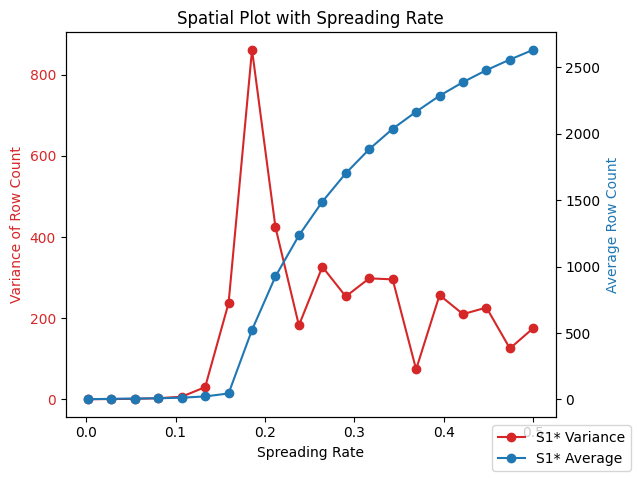

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Variance of Row Count', color=color)
ax1.plot(b, s1var, color=color, marker = 'o', label= 'S1* Variance')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(b, s1av, color=color, marker = 'o', label= 'S1* Average')
ax2.set_ylabel('Average Row Count', color=color)
# plt.axvline(x=0.1745263157894737, color='g', label = 'critical point for pseudo mixing time')


fig.legend(loc = 'lower right')
plt.title('Spatial Plot with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [2]:
N =  4000
M = 3*N
Tmax = 200

## try changing Tmax = 200


## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

In [4]:
b = np.linspace(0.002, 0.5, 20)
s1starvar = []
s1starav = []
for i in range(len(b)):
    s1 = []
    for j in range(100):
        times, R, spatial = find_tranformation_matrix(b[i], E, N, Tmax, 0)
        s1.append(spatial)
    s1starav.append(np.mean(s1))
    s1starvar.append(np.var(s1))
    print('b completed: ', b[i], 'average: ', s1starav[i], 'variance: ', s1starvar[i])
print(s1starav)
print(s1starvar)

b completed:  0.002 average:  2.23 variance:  0.17710000000000004
b completed:  0.02821052631578947 average:  4.77 variance:  0.6771
b completed:  0.054421052631578946 average:  6.8 variance:  1.1
b completed:  0.08063157894736842 average:  9.16 variance:  2.8944
b completed:  0.10684210526315789 average:  13.35 variance:  6.7075
b completed:  0.13305263157894737 average:  20.78 variance:  21.511599999999998
b completed:  0.15926315789473683 average:  47.36 variance:  246.71039999999996
b completed:  0.18547368421052632 average:  459.83 variance:  1798.0611000000001
b completed:  0.21168421052631578 average:  885.7 variance:  615.5099999999999
b completed:  0.23789473684210524 average:  1205.17 variance:  441.8411000000001
b completed:  0.26410526315789473 average:  1464.73 variance:  542.0771
b completed:  0.2903157894736842 average:  1683.32 variance:  375.1775999999999
b completed:  0.31652631578947366 average:  1867.65 variance:  304.2675
b completed:  0.3427368421052631 average:  

took 3 hundred minutes == 5 hours to run

In [ ]:
bstarav = [2.23, 4.77, 6.8, 9.16, 13.35, 20.78, 47.36, 459.83, 885.7, 1205.17, 1464.73, 1683.32, 1867.65, 2023.25, 2156.48, 2275.45, 2379.2, 2468.97, 2553.49, 2629.41]

bstarvar = [0.17710000000000004, 0.6771, 1.1, 2.8944, 6.7075, 21.511599999999998, 246.71039999999996, 1798.0611000000001, 615.5099999999999, 441.8411000000001, 542.0771, 375.1775999999999, 304.2675, 293.8675, 330.66960000000006, 268.0875, 216.22000000000008, 186.22910000000005, 185.30990000000003, 266.30189999999993]

In [5]:
b = np.linspace(0.002, 0.5, 20)

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R, spatial = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


7.986271097625274
8.95840345447076
10.494437043300954
12.907432932571513
16.40219084717144
23.80969373883081
56.77728592703721
125.3372551834816
72.29723314272904
49.5718169091429
39.26506834545928
32.37385154951509
28.184023707793607
25.29217698377008
22.6043017018175
20.472289467211066
19.009230341196787
16.60653442238445
15.848164635415106
16.287358815638704
[7.986271097625274, 8.95840345447076, 10.494437043300954, 12.907432932571513, 16.40219084717144, 23.80969373883081, 56.77728592703721, 125.3372551834816, 72.29723314272904, 49.5718169091429, 39.26506834545928, 32.37385154951509, 28.184023707793607, 25.29217698377008, 22.6043017018175, 20.472289467211066, 19.009230341196787, 16.60653442238445, 15.848164635415106, 16.287358815638704]


In [6]:
pmixing = [7.986271097625274, 8.95840345447076, 10.494437043300954, 12.907432932571513, 16.40219084717144, 23.80969373883081, 56.77728592703721, 125.3372551834816, 72.29723314272904, 49.5718169091429, 39.26506834545928, 32.37385154951509, 28.184023707793607, 25.29217698377008, 22.6043017018175, 20.472289467211066, 19.009230341196787, 16.60653442238445, 15.848164635415106, 16.287358815638704]

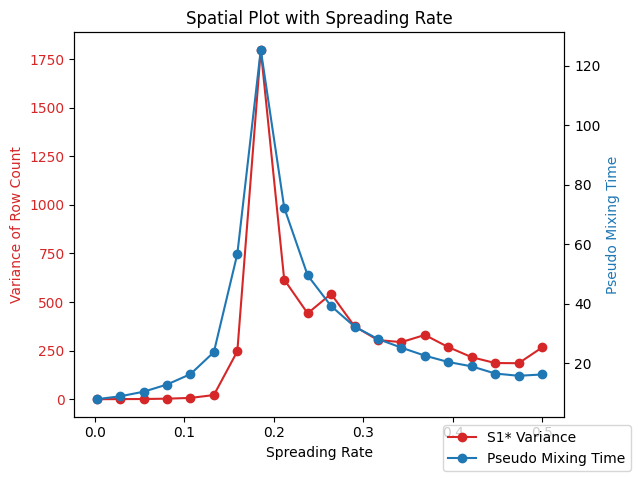

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Variance of Row Count', color=color)
ax1.plot(b, s1starvar, color=color, marker = 'o', label= 'S1* Variance')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(b, pmixing, color=color, marker = 'o', label= 'Pseudo Mixing Time')
ax2.set_ylabel('Pseudo Mixing Time', color=color)


fig.legend(loc = 'lower right')
plt.title('Spatial Plot with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [2]:
N =  2000
M = 3*N
Tmax = 200

## try changing Tmax = 200


## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

In [3]:
b = np.linspace(0.002, 0.5, 20)
s1starvar = []
s1starav = []
for i in range(len(b)):
    s1 = []
    for j in range(500):
        times, R, spatial = find_tranformation_matrix(b[i], E, N, Tmax, 0)
        s1.append(spatial)
    s1starav.append(np.mean(s1))
    s1starvar.append(np.var(s1))
    print('b completed: ', b[i], 'average: ', s1starav[i], 'variance: ', s1starvar[i])
print(s1starav)
print(s1starvar)

b completed:  0.002 average:  2.124 variance:  0.112624
b completed:  0.02821052631578947 average:  4.434 variance:  0.5616439999999999
b completed:  0.054421052631578946 average:  6.288 variance:  1.2290560000000001
b completed:  0.08063157894736842 average:  8.612 variance:  2.993456
b completed:  0.10684210526315789 average:  12.072 variance:  7.806816
b completed:  0.13305263157894737 average:  18.35 variance:  23.5835
b completed:  0.15926315789473683 average:  39.606 variance:  210.482764
b completed:  0.18547368421052632 average:  268.004 variance:  722.187984
b completed:  0.21168421052631578 average:  478.564 variance:  306.901904
b completed:  0.23789473684210524 average:  639.844 variance:  272.247664
b completed:  0.26410526315789473 average:  768.146 variance:  178.772684
b completed:  0.2903157894736842 average:  874.892 variance:  186.708336
b completed:  0.31652631578947366 average:  964.564 variance:  150.469904
b completed:  0.3427368421052631 average:  1041.554 varia

In [4]:
b = np.linspace(0.002, 0.5, 20)

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R, spatial = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


7.223090255462566
8.812742301629742
10.015423373832466
11.74180535224169
15.991921234034919
20.047888513171966
36.428430365176794
87.53467910280298
62.79735480765563
45.237820427121235
35.62553611053166
29.029862783474364
25.37506180584518
21.779777384861
19.579239932854513
18.487491217081377
15.885726604962645
15.796673124012377
14.988936138019568
13.335528522169707
[7.223090255462566, 8.812742301629742, 10.015423373832466, 11.74180535224169, 15.991921234034919, 20.047888513171966, 36.428430365176794, 87.53467910280298, 62.79735480765563, 45.237820427121235, 35.62553611053166, 29.029862783474364, 25.37506180584518, 21.779777384861, 19.579239932854513, 18.487491217081377, 15.885726604962645, 15.796673124012377, 14.988936138019568, 13.335528522169707]


In [1]:
import numpy as np
s1starvar = [0.112624, 0.5616439999999999, 1.2290560000000001, 2.993456, 7.806816, 23.5835, 210.482764, 722.187984, 306.901904, 272.247664, 178.772684, 186.708336, 150.469904, 137.92708399999998, 112.17793600000002, 120.064204, 104.90959999999998, 90.876784, 100.90884400000002, 88.94729600000001]
b = np.linspace(0.002, 0.5, 20)
s1std = np.array(s1starvar)**0.5
pmixing = [7.223090255462566, 8.812742301629742, 10.015423373832466, 11.74180535224169, 15.991921234034919, 20.047888513171966, 36.428430365176794, 87.53467910280298, 62.79735480765563, 45.237820427121235, 35.62553611053166, 29.029862783474364, 25.37506180584518, 21.779777384861, 19.579239932854513, 18.487491217081377, 15.885726604962645, 15.796673124012377, 14.988936138019568, 13.335528522169707]


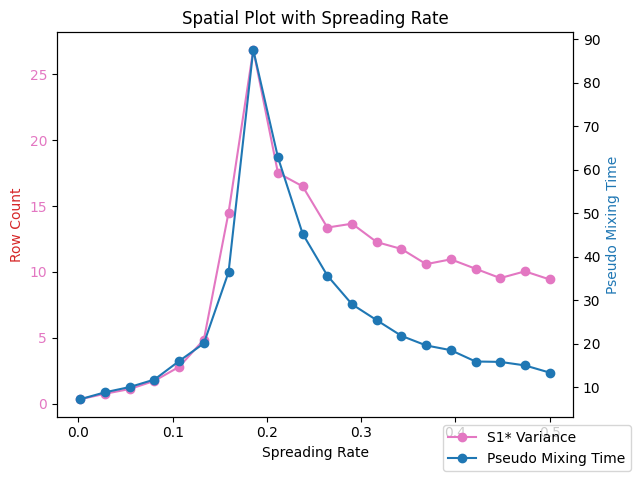

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Row Count', color=color)
# ax1.plot(b, s1starvar, color=color, marker = 'o', label= 'S1* Variance')
color = 'tab:pink'
ax1.plot(b, s1std, color=color, marker = 'o', label= 'S1* Standard Deviation')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(b, pmixing, color=color, marker = 'o', label= 'Pseudo Mixing Time')
ax2.set_ylabel('Pseudo Mixing Time', color=color)


fig.legend(loc = 'lower right')
plt.title('Spatial Plot with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
